# Лекция 1. Статистические методы

## Содержание
[1.2 Постановка задачи](#1.2)  
[1.3 Расстояние Пирсона](#1.3)   
[1.4 Распределение Хи-квадрат Пирсона](#1.4)  
[1.5 Расчет p-уровня значимости](#1.5)  
[1.6 Анализ таблиц сопряженности. Ожидаемые значения](#1.6)  
[1.7 Анализ таблиц сопряженности. Хи-квадрат](#1.7)  
[1.8 Точный критерий Фишера](#1.8)  

[Практические задания на python](#practice1)

## 1.2 Постановка задачи<a id='1.2'></a>

### Статистические методы:  
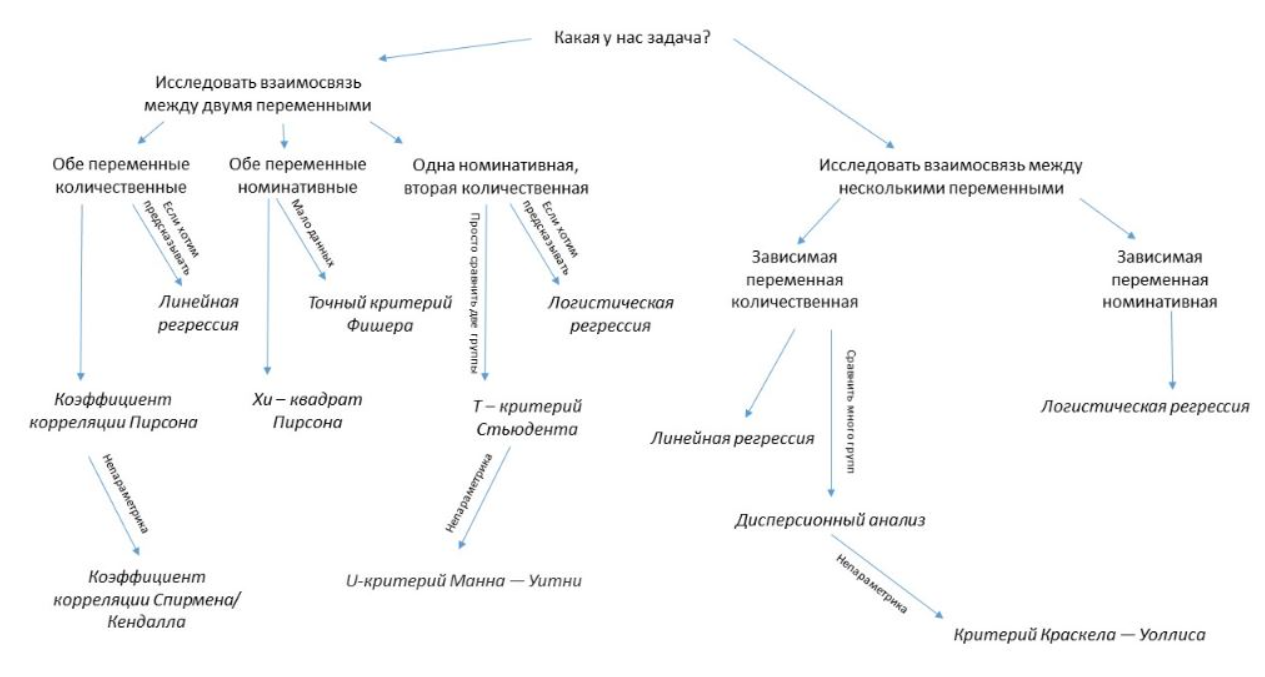  

**Основные типы задач анализа номинативных данных:**  
1) Проверка гипотезы о распределении **номинативной переменной**;  
2) Проверка гипотезы о взаимосвязи **двух номинативных переменных**;  
3) Логистичесская регрессия.

## 1.3 Расстояние Пирсона<a id='1.3'></a>

### Основные определения и тезисы:  
**Хи-квадрат Пирсона** (Chi²) - используется для оценки того, насколько хорошо эмпирические частоты в кросс-таблице соответствуют ожидаемым частотам, если две переменные независимы. Расстояние хи-квадрат не может быть отрицательным.  

**Формула для вычисления**: Chi² = Σ((O - E)^2 / E)  
где O - фактические частоты, E - ожидаемые частоты, и Σ - сумма по всем ячейкам кросс-таблицы.  

**Применение критерия Пирсона**:  
1) Сформулировать гипотезы. H0 - две категориальные переменные независимы, а альтернативная H1 - что они зависимы.  
2) Собрать данные в кросс-таблицу, показывающей количество наблюдений для каждой комбинации значений двух переменных.  
3) Вычислить ожидаемые частоты.  
4) Вычислить статистику критерия. Статистика критерия вычисляется путем сравнения фактических и ожидаемых частот в кросс-таблице.  
5) Вычислить p-value.  
6) Если p-value меньше уровня значимости(обычно 0.05), то нулевая гипотеза отвергается в пользу альтернативной гипотезы, и можно сделать вывод о том, что две категориальные переменные связаны.  

Для применения:  
* Наблюдения должны быть независимы;
* Минимальное кол-во наблюдений в каждой из ячеек должно быть больше 5.

### Примеры:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats

Задача: Определить, насколько статистически значимы различия между теоретическими и эмпирическими значениями:  
H0: Распределение частот не отличимо от ожидаемого;  
H1: Распределение частот отличимо от ожидаемого.  
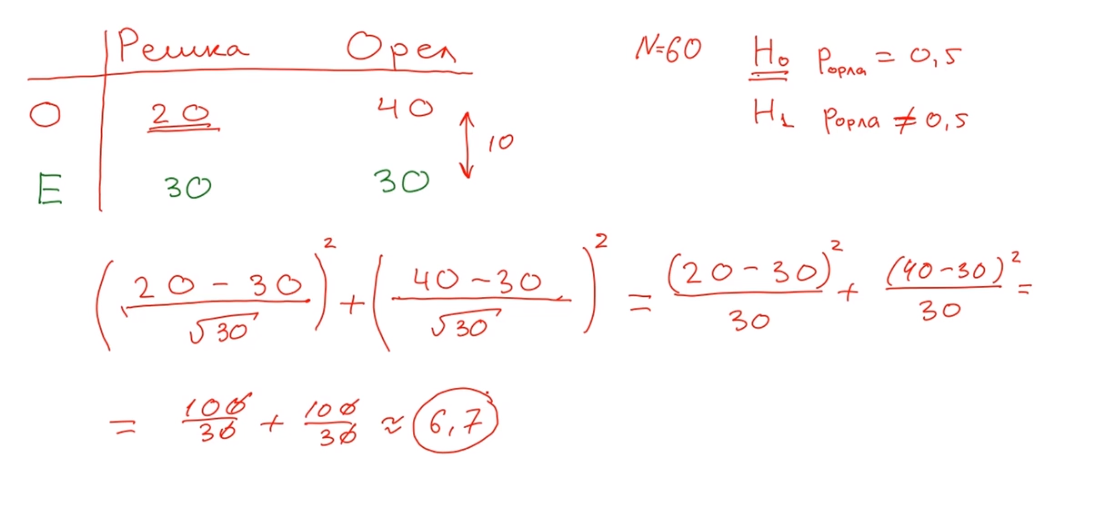  


    Подсчет вручную:
    Chi² = 6.666666666666667
    
    Подсчёт методом stats.chisquare:
    Chi² = 6.666666666666667
    


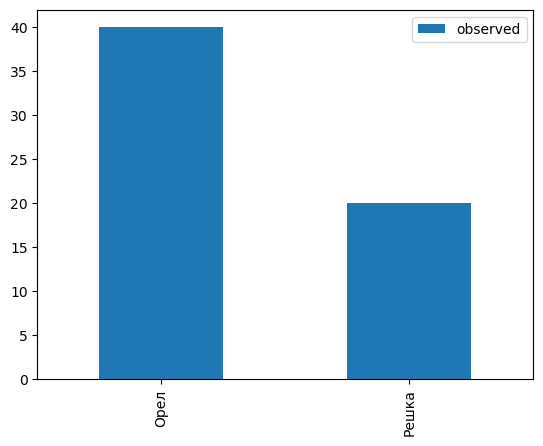

In [2]:
def coin(size=60, tail = None, eagle = None):
    if tail == None or eagle == None:
        arr = [np.random.randint(2) for _ in range(size)]
        tail, eagle = 0, 0
        for i in arr:
            if i == 0:
                tail += 1
            else:
                eagle += 1
    expected_num = size / 2            
    df = pd.DataFrame({'Орел': [eagle, expected_num],
                      'Решка': [tail, expected_num]}, index = ['observed','expected'])
    df.loc['observed'].to_frame().plot(kind='bar')
    # Вручную
    chi = ((tail - expected_num)**2) / expected_num + ((eagle - expected_num)**2) / expected_num
    # scipy.stats
    chi_2, p_2 = stats.chisquare([tail,eagle])
    print(f'''
    Подсчет вручную:
    Chi\N{SUPERSCRIPT TWO} = {chi}
    
    Подсчёт методом stats.chisquare:
    Chi\N{SUPERSCRIPT TWO} = {chi_2}
    ''')
coin(tail=20, eagle=40)

In [3]:
""" Монах Грегор Иоганн выращивал горох трех цветов (бедняга надеялся, что это поможет ему сделать важное открытие).  
    В одном из опытов эмпирическое распределение частот некоторого цвета гороха приняло следующий вид:  
    18, 55, 27 
    Чему будут равны ожидаемые значения частот, если предполагаемое теоретическое распределение имеет следующий вид:
    1:2:1 """

obs1, obs2, obs3= 18, 55, 27
obs_sum = obs1 + obs2 + obs3

coef1, coef2, coef3 = 1, 2, 1  
coef_sum = coef1 + coef2 + coef3

E1, E2, E3 = [obs_sum / coef_sum * coef for coef in [coef1, coef2, coef3]]
print(E1,E2,E3, sep=", ")

25.0, 50.0, 25.0


In [4]:
""" Рассчитайте расстояние хи-квадрат и введите получившееся значение с точностью хотя бы до одной цифры после запятой. """
Chi_sq = ((obs1 - E1)**2 / E1) + ((obs2 - E2)**2 / E2) + ((obs3 - E3)**2 / E3)
round(Chi_sq, 1)
# stats.chisquare([18,55,27], f_exp=[25, 50, 25])

2.6

## 1.4 Распределение Хи-квадрат Пирсона<a id='1.4'></a>

### Основные определения и тезисы:
**Распределение Хи-квадрат** с **k** степенями свободы(кол-во слагаемых) - это распределение суммы квадратов k независимых стандартных нормальных случайных величин.  
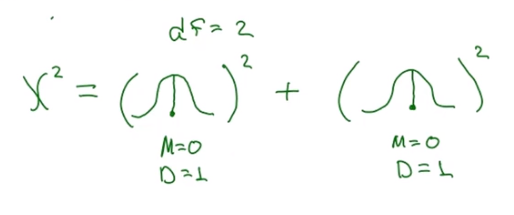  
Если верна H0, распределение ассиметрично, большинство значений группируются около нуля. Но чем больше число степеней свободы, тем более симметричным становится оно становится, и тем больше стремится к нормальному.

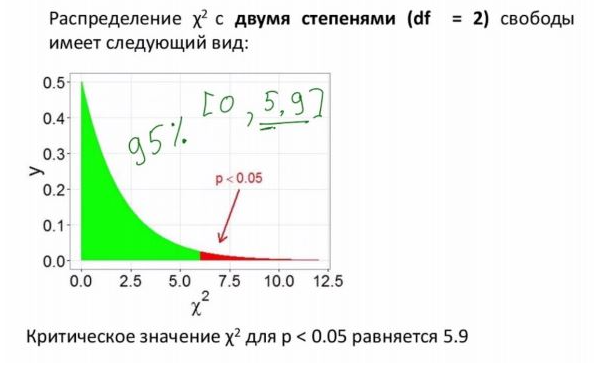  

### Примеры:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

import random

In [2]:
""" Рассчет критического значения Chi_squared """
stats.distributions.chi2.ppf(df=2, q=0.95)

5.991464547107979

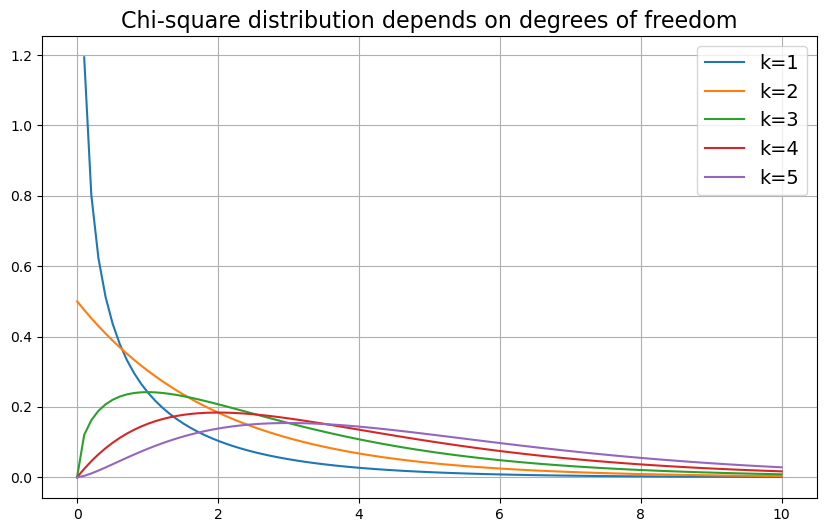

In [3]:
""" Распределение Chi_squared в зависимости от количества степеней свободы """
plt.figure(figsize=(10, 6))

df_s = 5

x = np.linspace(0, 10, 100)

for i in range(df_s):
    df = i + 1
    plt.plot(x, stats.chi2.pdf(x, df), label=f'k={df}')
plt.legend(bbox_to_anchor=(1, 1), fontsize=14)
plt.title('Сhi-square distribution depends on degrees of freedom', fontsize=16)
plt.grid()
plt.show()

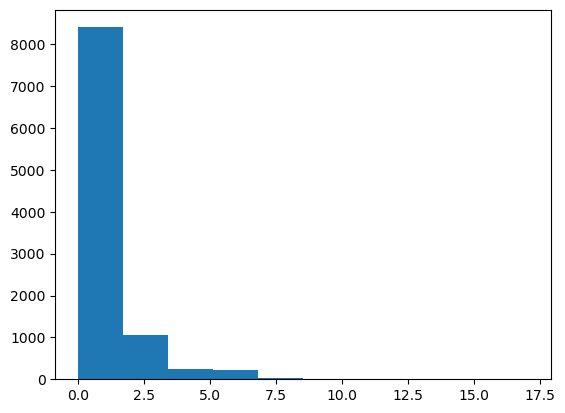

In [4]:
""" Как будет выглядеть распределение расстояния хи-квадрат в нашем эксперименте с монеткой при многократном 
    повторении эксперимента (при условии, что верна нулевая гипотеза). 
    Представьте, что мы при каждом повторении эксперимента рассчитываем расстояние хи - квадрат и в итоге 
    строим гистограмму получившихся значений. """
y = []
# 10000 экспериментов
for i in range(10000):

    x = []
    # 60 бросков монеты
    for i in range(60):
        x.append(random.randint(0, 1))
    # рассчет chi_squared
    y.append((x.count(0) - 30)**2 / 30 + (x.count(1) - 30)**2 / 30)
    
plt.hist(y)
plt.show()

## 1.5 Расчет p-уровня значимости<a id='1.5'></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats

In [2]:
""" Расчет p-value с помощью scipy """
obs = [20,40]
E = [30,30]

print("Вероятность получить такое или более экстремальное распределение (p-value):", 
      (stats.chisquare(f_obs = obs, f_exp = E).pvalue))

Вероятность получить такое или более экстремальное распределение (p-value): 0.009823274507519235


### Примеры:


    Подсчет вручную:
    Chi² = 6.666666666666667
    p_value = 0.009823274507519235
    
    Подсчёт методом stats.chisquare:
    Chi² = 6.666666666666667
    p_value = 0.009823274507519235
    
Отклоняем H0, 0.009823274507519235 < 0.05. Наше распределение неравномерно


(          Орел  Решка
 observed  40.0   20.0
 expected  30.0   30.0,
 6.666666666666667,
 0.009823274507519235)

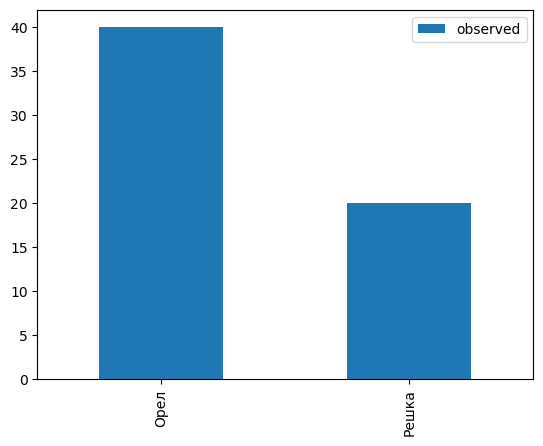

In [3]:
def coin(size=60, tail = None, eagle = None):
    if tail == None or eagle == None:
        arr = [np.random.randint(2) for _ in range(size)]
        tail, eagle = 0, 0
        for i in arr:
            if i == 0:
                tail += 1
            else:
                eagle += 1
    expected_num = size / 2            
    df = pd.DataFrame({'Орел': [eagle, expected_num],
                      'Решка': [tail, expected_num]}, index = ['observed','expected'])
    # График
    df.loc['observed'].to_frame().plot(kind='bar')
    # Вручную
    chi = ((tail - expected_num)**2) / expected_num + ((eagle - expected_num)**2) / expected_num
    p_value = stats.chi2.sf(chi,df.shape[0] - 1)
    # scipy.stats
    chi_2, p_2 = stats.chisquare([tail,eagle])
    print(f'''
    Подсчет вручную:
    Chi\N{SUPERSCRIPT TWO} = {chi}
    p_value = {p_value}
    
    Подсчёт методом stats.chisquare:
    Chi\N{SUPERSCRIPT TWO} = {chi_2}
    p_value = {p_2}
    ''')
    if p_2 < 0.05:
        print(f'Отклоняем H0, {p_value} < 0.05. Наше распределение неравномерно')
    else:
        print('Распределение равномерно')
    return df, chi, p_value

coin(tail=20, eagle=40)

In [4]:
""" Какая доля наблюдений лежит в диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы? """
a = stats.chi2.cdf(2 , df = 2)
b = stats.chi2.cdf(4 , df = 2)
c = b - a
print(a)
print(b)
print(c)

0.6321205588285577
0.8646647167633873
0.23254415793482963


In [5]:
""" Теперь рассчитаем p-уровень значимости для нашего примера с игральной костью. 
    Напомню, что мы получили следующие значения наблюдаемых частот (от единички до шестерки): 
    10, 10, 10, 5, 10, 15
    Проверьте нулевую гипотезу о том, что эмпирическое распределение частот не отличается от равномерного."""
ObservedValues = np.asarray([10, 10, 10, 5, 10, 15])
ExpectedValues = 10*np.ones(np.shape(ObservedValues))

chi = np.sum((ObservedValues-ExpectedValues)**2/ExpectedValues)

df = len(ObservedValues) - 1 

p = 1 - stats.chi2.cdf(chi, df) #cdf возвращает площадь справа, а нам надо слева, поэтому отнимаем от 1

if (chi > 0.05):
    print("H0 - принимается, распределение частот не отличается от равномерного")
else:
    print("H0 - отклоняется, распределение частот отличается от равномерного")
    
print("p-value =", p)

H0 - принимается, распределение частот не отличается от равномерного
p-value = 0.415880186995508


In [6]:
""" stats.chisquare """
def chi_test(obs, exp=None):
    chi, p = stats.chisquare(obs, exp)

    if (p > 0.05):
        print("H0 - принимается, распределение частот не отличается от равномерного")
    else:
        print("H0 - отклоняется, распределение частот отличается от равномерного")
    
    print("Chi^2 =", chi, "\np-value =", p)

ObservedValues = np.asarray([10, 10, 10, 5, 10, 15])
chi_test(ObservedValues)

H0 - принимается, распределение частот не отличается от равномерного
Chi^2 = 5.0 
p-value = 0.4158801869955079


In [7]:
""" Вернемся к нашему примеру с политическими партиями! 
    Проверьте гипотезу о том, что в ГС нет никаких различий в предпочтениях трех партий.
    Партия А = 10, Партия Б = 30, Партия В = 50. """

chi_test([10,30,50])

H0 - отклоняется, распределение частот отличается от равномерного
Chi^2 = 26.666666666666668 
p-value = 1.61959679231261e-06


In [8]:
""" Недавно я пришел на лекцию в Институт биоинформатики и обнаружил, что в группе различное число студентов 
    женского и мужского пола: 15 юношей и 9 девушек. Возможно, кого-то это и могло бы оставить равнодушным, 
    а я вот сразу взял лист бумаги и ручку, чтобы проверить гипотезу о том, что распределение частот девушек и юношей 
    не отличается от равномерного в генеральной совокупности биоинформатиков! 
    Давайте сверим наши результаты. Введите в поле для ответа получившийся у вас p-уровень значимости. """

chi_test([15,9])

H0 - принимается, распределение частот не отличается от равномерного
Chi^2 = 1.5 
p-value = 0.22067136191984324


In [9]:
""" В 2013 году Эдвард Сноуден передал СМИ секретную информацию АНБ, касающуюся слежки американских спецслужб 
    за информационными коммуникациями между гражданами. Однако его поступок вызвал неоднозначную реакцию в обществе. 
    Исследовательский центр USA TODAY провел опрос 1500 граждан США с целью выяснить, воспринимают ли они поступок Сноудена 
    как положительный или отрицательный. 53% опрошенных респондентов оценили разоблачение положительно.
    При помощи теста хи-квадрат проверьте нулевую гипотезу о том, что в генеральной совокупности распределение 
    отношения к поступку Сноудена является равномерным, то есть 50 на 50.
    Введите в ответ получившийся p-уровень значимости для проверки этой гипотезы. """

N = 1500
chi_test(obs = [(N / 100 * 53), (N / 100 * (100-53))], exp = [N/2, N/2])

H0 - отклоняется, распределение частот отличается от равномерного
Chi^2 = 5.4 
p-value = 0.02013675155034633


## 1.6 Анализ таблиц сопряженности. Ожидаемые значения<a id='1.6'></a>

**Наблюдаемые значения**:
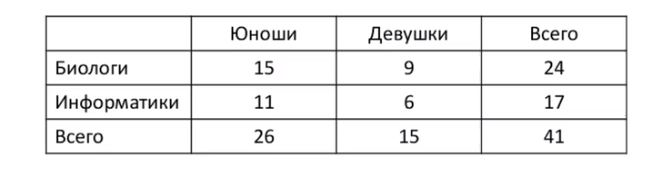  
H0 - Распределение не отличается от ожидаемого(переменная Пол не взаимосвязана с переменной Профессия);  
H1 - Распределение отличается (две переменные взаимосвязаны).  
 
**Рассчет ожидаемых значений**:  
Юношей 26 человек из 41 - 63.4%  
Девушек 15 из 41 - 36.6%  
Принимается H0, что профессия никак не связана с полом, тогда юноши и девушки должны с равной частотой наблюдаться у информатиков и биологов.  
Юноши Биологи = 24 / 100 * 63.4% = 15.2  (или 24 * 26 / 41)  
Юноши Информатики = 17 / 100 * 63.4% = 10.8  (или 17 * 26 / 41)  
Девушки Биологи = 8.8  
Девушки Информатики = 6.2  
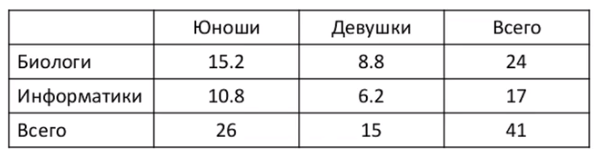  

**Формула рассчета ожидаемых значений**:  
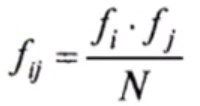

### Примеры:

In [1]:
import pandas as pd
from scipy import stats

In [2]:
""" В таблице представлены результаты эксперимента, направленного на проверку 
    гипотезы о взаимосвязи двух номинативных переменных с двумя градациями. 
    Рассчитайте ожидаемые частоты для проверки нулевой гипотезы о независимости двух переменных X и Y. """

data = pd.DataFrame({'Первая градация фактора Х': [10, 5], 'Вторая градация фактора Х': [6, 15]})
data.rename(index={0: 'Первая градация фактора У', 1: 'Вторая градация фактора У'}, inplace = True)
data

,Первая градация фактора Х,Вторая градация фактора Х
Первая градация фактора У,10,6
Вторая градация фактора У,5,15


In [3]:
""" Решение с помощью scipy """
stats.contingency.expected_freq(([10, 6], [5, 15]))

array([[ 6.66666667,  9.33333333],
       [ 8.33333333, 11.66666667]])

## 1.7 Анализ таблиц сопряженности. Хи-квадрат<a id='1.7'></a>

**Поправка Йетса на непрерывность** - В теории Chi² непрерывно, тогда как вычисляемые значения всегда дискретны, в результате H0 может отвергаться слишком часто. Чтобы скорректироватьь значения **p** - применяется данная поправка (Обычно применяется в таблицах 2х2, когда некоторые ожидаемые частоты меньше 10). Использование поправки Йейтса одобряется далеко не всеми; некоторые исследователи считают, что она может приводить к слишком сильной коррекции с понижением мощности и повышению вероятности ошибки второго рода.  
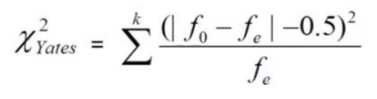  

**Формула Хи-квадрат: Chi² = Σ((O - E)^2 / E)**  
**df** = (n-1) * (m-1) = 1  - поскольку зная число наблюдений в 1 паре переменных и общее количество наблюдений, можно восстановить число наблюдений в остальных парах.  
Chi² = ((|15-15.2| - 0.5)^2 / 15.2) + ... + ((|6 - 6.2| - 0.5)^2 / 6.2) = 1.2684 * 10^-31  
H0 - принимается, отклонениея между наблюдаемыми и ожидаемыми значениями слишком малы.

### Примеры:

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

from scipy import stats
from scipy.stats import chi2_contingency

In [3]:
observed_values = [[15, 9], [11, 6]]
chi2, p_value, ddof, expected = chi2_contingency(observed_values)

print("df :", ddof)  
print("Expected values :\n", expected) 
print("Chi² :", chi2)  
print("p-value :", p_value)  

df : 1
Expected values :
 [[15.2195122  8.7804878]
 [10.7804878  6.2195122]]
Chi² : 0.0
p-value : 1.0


In [4]:
""" Перед знаком стоп некоторые водители останавливаются полностью, другие лишь сбавляют скорость, 
    но некоторые не останавливаются вообще. Важнейший вопрос, есть ли взаимосвязь 
    между полом и стилем вождения автомобиля!  
    Ниже представлена таблица сопряженности данных исследования, посвященного этому вопросу. """
data = pd.DataFrame({'Мужчины': [20, 11, 7], 'Женщины': [15, 12, 9]})
data.rename(index={0: 'Тормозят', 1: 'Притормаживают', 2: 'Не тормозят'}, inplace = True)
data

,Мужчины,Женщины
Тормозят,20,15
Притормаживают,11,12
Не тормозят,7,9


In [5]:
""" Чему равняется число степеней свободы в нашем случае? """
n = data.shape[0]
m = data.shape[1]

df = (n-1) * (m-1)
df

2

In [6]:
""" Проверьте нулевую гипотезу о взаимосвязи стиля вождения и пола водителя. 
    Введите получившейся p - уровень значимости. """
observed_values = [data.iloc[0].tolist(), data.iloc[1].tolist(), data.iloc[2].tolist()]
chi2, p_value, ddof, expected = chi2_contingency(observed_values)
p_value

0.6205162173513055

x-squared = 5.57719298245614
p-value = 0.018195864430772903
df = 1


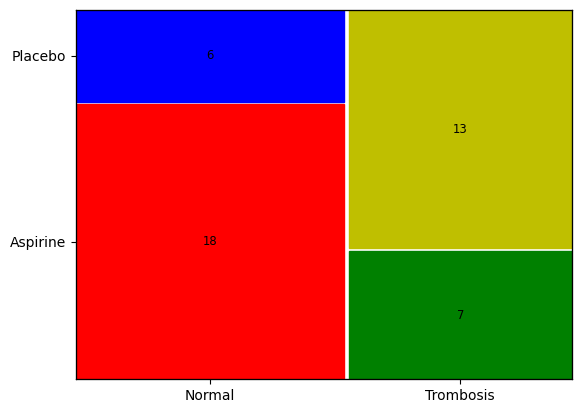

In [7]:
""" Mosaic plot """
obs = np.array([[18, 7], [6, 13]])
chi2, p, df, expected = stats.chi2_contingency(obs)

print('x-squared =', chi2)
print('p-value =', p)
print('df =', df)

# Создание словаря с названиями столбца,строки и значением
data = {}
k = []
for i, j in enumerate(obs):
    for l in range(len(j)):
        if l == 0:
            k.append('Normal') # название 1 столбца
        else:
            k.append('Trombosis') # название 2 столбца
        if i == 0:
            k.append('Aspirine') # название 1 строки
        else:
            k.append('Placebo') # название 2 строки
        data[tuple(k)] = j[l]
        k = []
# Сопоставление цветов и ключей словаря data
props = {} # Словарь цветов для метода mosaic
for i, j in zip(['r', 'g', 'b', 'y'], list(data.keys())):
    props[j] = {'color': i} 
labelizer = lambda k:data[k] # Функция с подписями (числа) каждой части 
my_plot = mosaic(data, gap=0.009, labelizer=labelizer, properties=props)

Обратимся к данным о катастрофе «Титаника». На графике представлена взаимосвязь пола пассажира «Титаника» и того, выжил он или нет в катастрофе. Размеры прямоугольников отвечают за пропорции наблюдений в той или иной ячейке, а цвет прямоугольников — за значение стандартизованного остатка в ячейках. Какие выводы мы можем сделать, проанализировав данный график?  
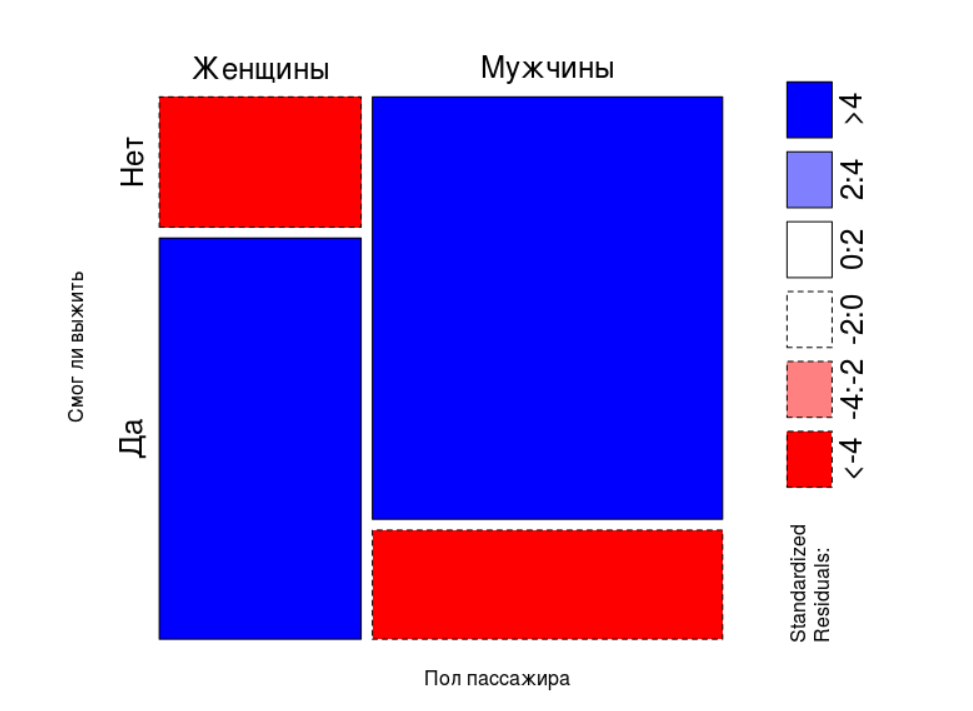  

* Значимые отклонения между наблюдаемыми и ожидаемыми результатами получены во всех ячейках, что позволяет говорить: мужчины вероятнее погибнут, чем выживут, а женщины — наоборот. **+**  
* На борту Титаника большинство пассажиров - мужчины. **+**   
* Есть все основания принять нулевую гипотезу о взаимосвязи пола и вероятности выжить в катастрофе.  
* Есть все основания отклонить нулевую гипотезу об отсутствии взаимосвязи пола и вероятности выжить в катастрофе. **+**  
* Значимые отклонения между наблюдаемыми и ожидаемыми результатами получены только в ячейках: Женщины: Не выжили и Мужчины: Выжили.  
* На борту Титаника большинство пассажиров - женщины.  
* Значимые отклонения между наблюдаемыми и ожидаемыми результатами получены только в ячейках: Женщины: Выжили и Мужчины: Не выжили.  
* Значимые отклонения между наблюдаемыми и ожидаемыми результатами получены во всех ячейках, что позволяет говорить: женщины вероятнее погибнут, чем выживут, а мужчины — наоборот.  


А теперь изучим данные о взаимосвязи шанса выжить в кораблекрушении «Титаника» и класса билета пассажира. В данном случае график стандартизированных остатков построен по результатам таблицы сопряженности 3 на 2.

Какие выводы мы можем сделать в данном случае?  
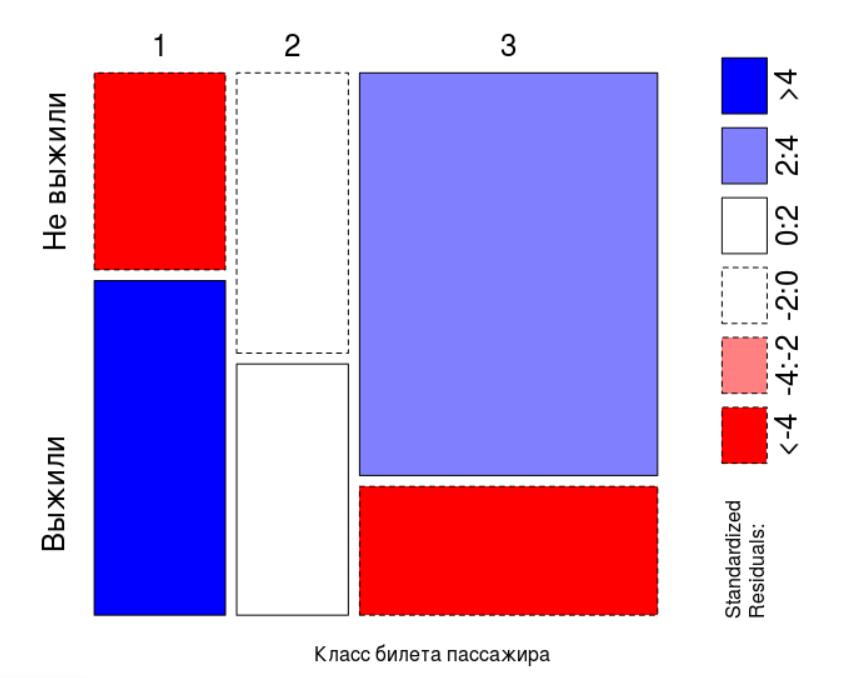  
* Величина отклонения ожидаемых и наблюдаемых частот одинакова во всех ячейках таблицы.  
* Для пассажира с билетом первого класса вероятность выжить выше вероятности погибнуть. **+**  
* Наши данные не позволяют нам сделать вывод о статистически значимом различии в вероятности выжить или погибнуть у пассажиров второго класса. **+**  
* Пассажиры из третьего класса чаще погибали в катастрофе, чем пассажиры второго класса. **+**  


## 1.8 Точный критерий Фишера<a id='1.8'></a>

### Основные определения и тезисы:  
**Точный критерий фишера** - используется для анализа таблицы сопряженности, в которой экстремально мало наблюдений, в некоторых ячейках число ожидаемых и наблюдаемых частот может быть меньше пяти.  

**Критерий хи-квадрат с поправкой Йетса** - используется для анализа таблицы сопряженности два на два, где значения ожидаемых и наблюдаемых частот в каждой ячейке больше 5, но меньше 10.  

**Критерий хи-квадрат** - используется для анализа таблицы произвольного размера, где значения ожидаемых и наблюдаемых частот в каждой ячейке больше 10.  

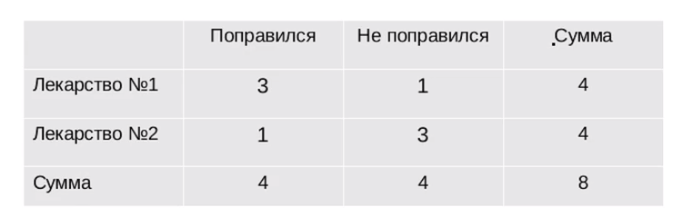  

In [1]:
from scipy import stats

In [2]:
""" Рассчет критерия Фишера с помощью scipy """

odds_ratio, p_value = stats.fisher_exact([[1, 3], [3, 1]])  # odds_ratio - отношение шансов
# при использовании лекарства 1 и лекарства 2 вероятность поправиться одинакова, принимается H0
print(p_value)

0.48571428571428565


## Практические задания на python<a id="practice1"></a>

In [1]:
""" Напишите функцию NA_position, которая получает на вход два числовых вектора одинаковой длины. 
    Функция должна возвращать TRUE, если позиции NA в обоих векторах совпадают или пропущенных значений вообще нет, 
    и значение FALSE, если позиции NA в векторах не совпадают. """
import numpy as np
import pandas as pd

def NA_position(x, y):
    df = pd.DataFrame({'x': x, 'y': y})
    result = pd.DataFrame(pd.isna(df['x']) == pd.isna(df['y'])).all(axis=None)
    return result

In [2]:
v1  = [1, 2, 3]
v2  = [3, 4, 6]

NA_position(v1, v2)

True

In [3]:
v1  = [1, 2, np.nan]
v2  = [3, 4, np.nan]

NA_position(v1, v2)

True

In [4]:
v1  = [np.nan, 2, np.nan]
v2  = [3, 4, np.nan]

NA_position(v1, v2)

False

In [3]:
""" Напишите функцию smart_test, которая получает на вход dataframe
    с двумя номинативными переменными с произвольным числом градаций. 
    Функция должна проверять гипотезу о независимости этих двух переменных 
    при помощи критерия хи - квадрат или точного критерия Фишера.

    Если хотя бы в одной ячейке таблицы сопряженности двух переменных меньше 5 наблюдений, 
    функция должна рассчитывать точный критерий Фишера и возвращать вектор из одного элемента: 
    получившегося p - уровня значимости.

    Если наблюдений достаточно для расчета хи-квадрат (во всех ячейках больше либо равно 5 наблюдений), 
    тогда функция должна применять критерий хи-квадрат и возвращать вектор из трех элементов: 
    значение хи-квадрат, число степеней свободы, p-уровня значимости. """
import numpy as np
import pandas as pd

from scipy import stats

def smart_test(x):
    table = x.pivot_table(index = x.columns[0], columns = x.columns[1], aggfunc=lambda x: len(x)).to_numpy()
    print(table)

    if all((table>=5).reshape(-1)):
        chi2_value, p_value, df, expected_array = stats.chi2_contingency(table, correction=True)
        return [chi2_value, df, p_value]
    
    else:
        odds_ratio, p_value = stats.fisher_exact(table)
        return p_value

In [4]:
# Достаточно наблюдений в таблице
mtcars_df = pd.read_csv("data_mtcars.csv")
mtcars_df1 = mtcars_df.loc[: , ("am","vs")]

smart_test(mtcars_df1)

[[12  7]
 [ 6  7]]


[0.34753550543024225, 1, 0.5555115470131495]

In [5]:
# Недостаточно наблюдений в таблице
mtcars_df2 = mtcars_df.loc[: 19 , ("am","vs")]
smart_test(mtcars_df2)

[[8 6]
 [2 4]]


0.628482972136223

In [1]:
""" Напишите функцию most_significant, которая получает на вход dataframe с произвольным количеством переменных, 
    где каждая переменная это нуклеотидная последовательность.  
    
    Для каждой переменной мы можем проверить нулевую гипотезу о том, 
    что все нуклеотиды (A, T, G, C) встречаются равновероятно внутри этой последовательности. 
    Однако, возможно, что в некоторых последовательностях распределение частоты встречаемости 
    каждого нуклеотида отличается от равномерного. 
    
    Функция должна возвращать вектор с названием переменной (или переменных), 
    в которой был получен минимальный p - уровень значимости при проверке гипотезы о равномерном 
    распределении нуклеотидов при помощи критерия хи - квадрат. """
import numpy as np
import pandas as pd

from scipy.stats import chisquare

def most_significant(data):
    p_lowest = 1
    
    for i, col in enumerate(data.columns):
        counts = data[col].value_counts()
        stat, p = chisquare(counts)
        
        if p_lowest > p:
            v = col
            p_lowest = p
            
    return v

In [2]:
test_data = pd.read_csv("https://stepic.org/media/attachments/course/524/test_data.csv")
most_significant(test_data)

'V3'

In [3]:
""" Воспользуемся данными Iris.
    Создайте новую переменную important_cases - фактор с двумя градациями ("No" и "Yes"). 
    Переменная должна принимать значение Yes, если для данного цветка 
    значения хотя бы трех количественных переменных выше среднего. 
    В противном случае переменная important_cases будет принимать значение No. """
import pandas as pd

iris_df = pd.read_csv("data_iris.csv", index_col = 0)

iris_means = iris_df.mean(axis=0, numeric_only=True)
comp = (iris_df.reindex(columns = iris_means.index) > iris_means).sum(axis=1)

iris_df["important_cases"] = "No"
iris_df.loc[comp >= 3, "important_cases"] = "Yes"

iris_df[["important_cases", "Species"]].groupby(by = "important_cases").count()

,Species
important_cases,
No,81
Yes,69


In [2]:
""" Обобщим предыдущую задачу! 
    Напишем функцию get_important_cases, которая принимает на вход dataframe 
    с произвольным числом количественных переменных (гарантируется хотя бы две переменные). 
    Функция должна возвращать dataframe с новой переменной - фактором important_cases.

    Переменная  important_cases принимает значение Yes, если для данного наблюдения 
    больше половины количественных переменных имеют значения больше среднего. 
    В противном случае переменная important_cases принимает значение No.

    Переменная  important_cases - фактор с двумя уровнями 0 - "No", 1  - "Yes".  
    То есть даже если в каком-то из тестов все наблюдения получили значения "No", фактор должен иметь две градации. """
import pandas as pd

def get_important_cases(data):
    half_var = data.shape[1]/2
    data_means = data.mean(axis=0, numeric_only = True)
    
    comp = (data.reindex(columns = data_means.index) > data_means).sum(axis=1)
    
    data["important_cases"] = "No"
    data.loc[comp >= half_var, "important_cases"] = "Yes"
    
    return data

In [3]:
iris_df = pd.read_csv("data_iris.csv", index_col = 0)
get_important_cases(iris_df)[["important_cases", "Species"]].groupby(by = "important_cases").count()

,Species
important_cases,
No,81
Yes,69


In [4]:
test_data = pd.DataFrame({'V1': [16, 21, 18], 'V2': [17, 7, 16], 'V3': [25, 23, 27], 
                          'V4': [20, 22, 18], 'V5': [16, 17, 19]})
get_important_cases(test_data)

,V1,V2,V3,V4,V5,important_cases
0,16,17,25,20,16,No
1,21,7,23,22,17,No
2,18,16,27,18,19,Yes


In [1]:
""" Напишите функцию stat_mode, которая получает на вход вектор из чисел произвольной длины 
    и возвращает числовой вектор с наиболее часто встречаемым значением. 
    Если наиболее часто встречаемых значений несколько, 
    функция должна возвращать несколько значений моды  в виде числового вектора. """

def stat_mode(x):
    count_number = 0
    for i in x:
        if x.count(i) > count_number:
            count_number = x.count(i)

    result = [i for i in x if x.count(i) == count_number]
    return set(result)


In [2]:
v = [1,2,3,3,3,4,5]
stat_mode(v)

{3}

In [3]:
v = [1,1,1,2,3,3,3]
stat_mode(v)

{1, 3}

In [3]:
""" Доктор Пилюлькин решил вооружиться статистикой, чтобы сравнить эффективность трех лекарств! 
    Давайте поможем ему и напишем функцию max_resid, которая получает на вход dataframe с двумя переменными: 
    типом лекарства и результатом его применения. 

    Drugs - фактор с тремя градациями: drug_1, drug_2, drug_3.     
    Result - фактор с двумя градациями: positive, negative.

    Функция должна находить ячейку таблицы сопряженности с максимальным  значением стандартизированного остатка 
    и возвращать вектор из двух элементов: название строчки и столбца этой ячейки. """
import pandas as pd
import statsmodels.api as sm

def max_resid(data):
    residuals = sm.stats.Table.from_data(data[['Result', 'Drugs']]).standardized_resids
    
    max_res = residuals[residuals == residuals.max().max()].dropna(axis=1, how="all").dropna()
    
    return (max_res.columns[0], max_res.index[0])

In [4]:
test_data = pd.read_csv("https://stepic.org/media/attachments/course/524/test_drugs.csv")
max_resid(test_data)

('drug_1', 'positive')

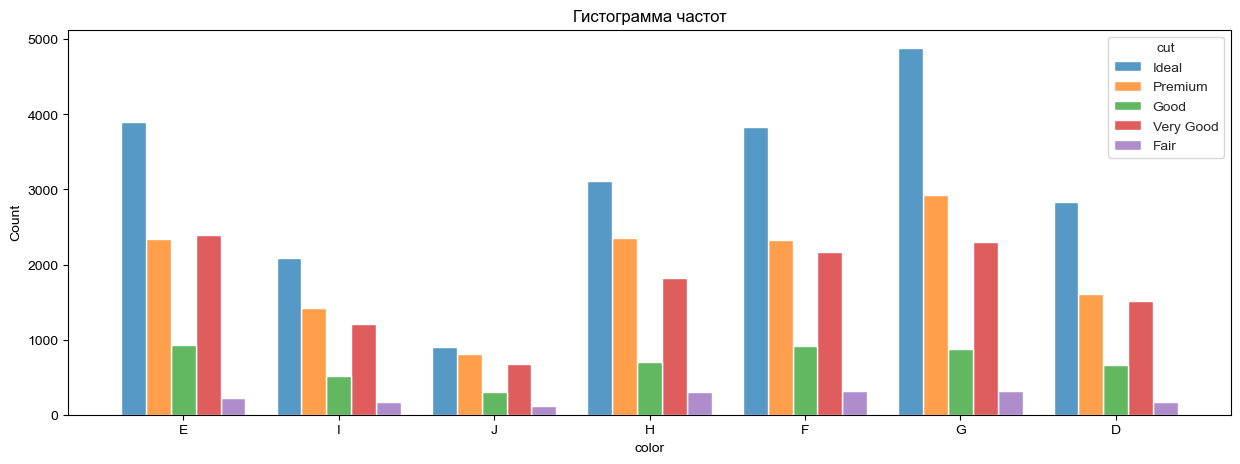

In [1]:
""" Ну и напоследок построим гистограмму частот """
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

diamonds_df = pd.read_csv('data_diamonds.csv', index_col = 0)

plt.figure(figsize=(15,5))
plt.title('Гистограмма частот')
sns.set_style('whitegrid')


sns.histplot(data = diamonds_df, x = 'color', hue = 'cut', multiple='dodge', shrink=.8, palette='tab10')


plt.show()